"Geo Data Science with Python" 
### Notebook Lesson 8b

# Singular Value Decomosition (SVD) and Principal Component Analysis (PCA)

This lesson discusses elements of signal decomposition methods SVD and PCA and how to perform them in Python.

### Sources

Brunton & Kutz, 2016 (see Syllabus for full reference).

---

## SVD: Simple Example 1

In [40]:
import numpy as np
X = np.random.rand(5,3) # create a random data matrix n=5, m = 3
X

array([[0.25851249, 0.02525423, 0.21078118],
       [0.78633872, 0.6711596 , 0.48331341],
       [0.97265966, 0.44936935, 0.37574008],
       [0.16153502, 0.39118045, 0.87883235],
       [0.10247736, 0.25551069, 0.76864708]])

In [41]:
U, S, V = np.linalg.svd(X,full_matrices = True ) # full SVD
Uhat, Shat, Vhat = np.linalg.svd(X,full_matrices = False ) # economy SVD

In [42]:
U


array([[-0.16010184, -0.03507974,  0.62490075, -0.43279738, -0.6287466 ],
       [-0.58625527, -0.28566449, -0.62263073, -0.39123836, -0.18429346],
       [-0.55375406, -0.51479492,  0.41934073,  0.38776234,  0.31958778],
       [-0.44519401,  0.58842229, -0.08371501,  0.55042588, -0.38155557],
       [-0.3547265 ,  0.55309186,  0.19742131, -0.45419235,  0.56832441]])

In [43]:
U.shape, S.shape, V.shape

((5, 5), (3,), (3, 3))

In [44]:
W = V
W.shape  # mxm

(3, 3)

---
## SVD: Dog Image (Example 2)

First let's look at an example dog image:

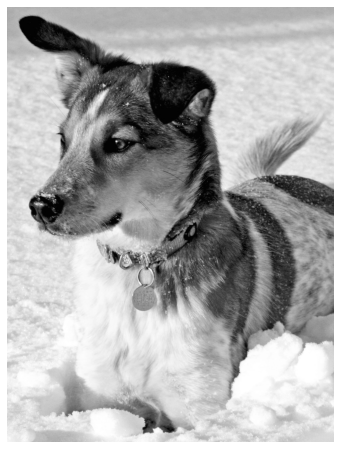

In [56]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize'] = [16, 8]

A = imread(os.path.join('.','svd_material','dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

Now we will perform a singular value decomposition of the dog image using the numpy `linalg` package:

In [6]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)
S.shape

(1500, 1500)

After decomposition, we can reconstruct the image with only some of the loadings:

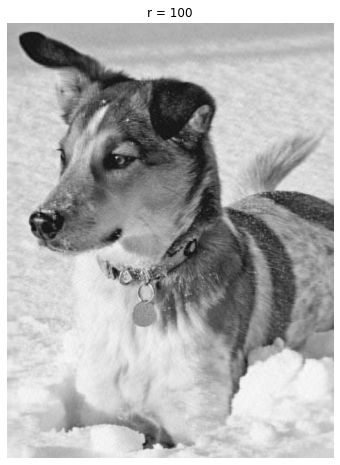

In [7]:
r = 100  # change to 1 to see first mode
Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
plt.figure()
img = plt.imshow(Xapprox)
img.set_cmap('gray')
plt.axis('off')
plt.title('r = ' + str(r))
plt.show()

These five loadings seem not enough to receive a sharp image. However, we also don't need all 1000:

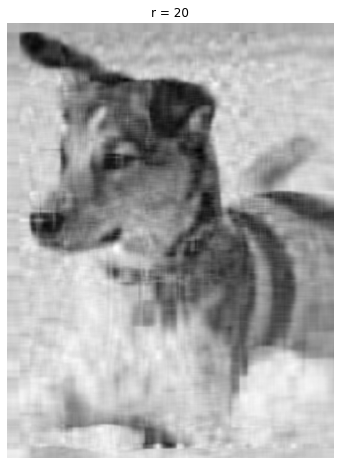

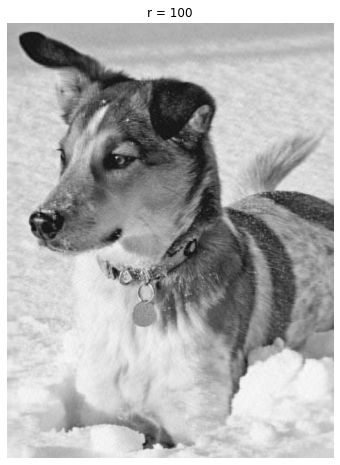

In [8]:
j = 0
for r in (20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

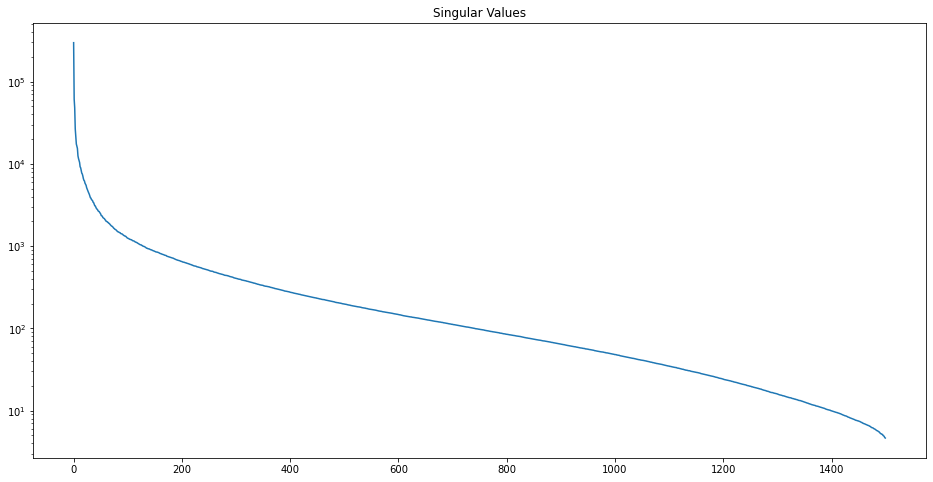

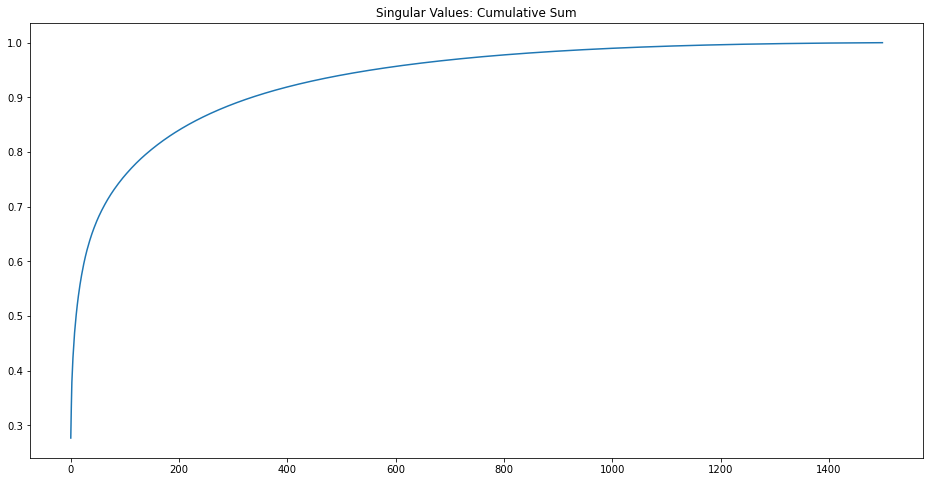

In [9]:
## f_ch01_ex02_2

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

---
## SVD: Principal Components in Dog Images (Example 3)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from mpl_toolkits.mplot3d import Axes3D

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

dogdata_mat = io.loadmat(os.path.join('.','svd_material','dogData.mat'))
catdata_mat = io.loadmat(os.path.join('.','svd_material','catData.mat'))
dog = dogdata_mat['dog']
cat = catdata_mat['cat']
# alternatively read data from csv file
#dog = np.genfromtxt('./svd_material/dogdata.csv',delimiter=',')
#cat = np.genfromtxt('./svd_material/catdata.csv',delimiter=',')

CD = np.concatenate((dog,cat),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)


In [47]:
dogdata_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Jan 12 16:13:19 2010',
 '__version__': '1.0',
 '__globals__': [],
 'dog': array([[224, 131, 127, ...,   6,  30, 197],
        [224, 124, 136, ...,  10,  69, 199],
        [224, 104, 127, ...,   6,  69, 195],
        ...,
        [100, 104, 115, ...,   7, 163, 166],
        [100, 124, 104, ...,  10, 140, 170],
        [100, 124, 104, ...,   7, 140, 171]], dtype=uint8)}

In [51]:
u.shape

(4096, 160)

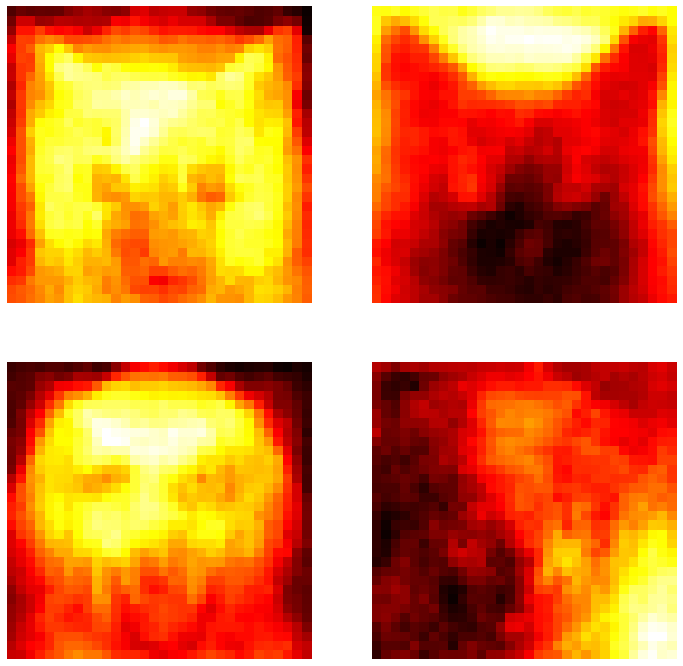

In [52]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    U = np.flipud(np.reshape(u[:,j],(64,64)))
    U2 = U[::2,::2]
    axs[j].pcolor(np.rot90(U2),cmap='hot')
    axs[j].axis('off')

These are the first four features, generated from the first four columns of the U matrix.

Now we can retrieve a histogram of the loadings (columns of the V matrix).

array([-2.63157895e-01, -2.36842105e-01, -2.10526316e-01, -1.84210526e-01,
       -1.57894737e-01, -1.31578947e-01, -1.05263158e-01, -7.89473684e-02,
       -5.26315789e-02, -2.63157895e-02, -1.38777878e-17,  2.63157895e-02,
        5.26315789e-02,  7.89473684e-02,  1.05263158e-01,  1.31578947e-01,
        1.57894737e-01,  1.84210526e-01,  2.10526316e-01,  2.36842105e-01,
        2.63157895e-01])

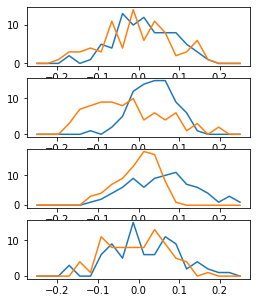

In [75]:
plt.rcParams['figure.figsize'] = [4, 5]
plt.rcParams.update({'font.size': 10})
xbin = np.linspace(-0.25,0.25,20)
xbin_edges = np.append(xbin,xbin[-1]+(xbin[1]-xbin[0])) - (xbin[1]-xbin[0])/2
fig,axs = plt.subplots(4,1)
for j in range(4):
    pdf1 = np.histogram(vT[j,:80],bins=xbin_edges)[0]
    pdf2 = np.histogram(vT[j,80:],bins=xbin_edges)[0]
    axs[j].plot(xbin,pdf1)
    axs[j].plot(xbin,pdf2)

xbin_edges

---
## SVD: TOS Image Reconstruction (Example 4)

First we load the dataset:

In [14]:
from netCDF4 import Dataset
data = Dataset('./tos_O1_2001-2002.nc')
lat = data.variables['lat'][:].data
lon = data.variables['lon'][:].data
time = data.variables['time'][:].data
tos = data.variables['tos'][:].data
tos = tos -  273.15; # convert unit to Celcius
tos[tos>=1e20] = 0   # set missing values to 0
data.close()

<ipython-input-14-17a6b4057f46>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = data.variables['lat'][:].data
<ipython-input-14-17a6b4057f46>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = data.variables['lon'][:].data
<ipython-input-14-17a6b4057f46>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To si

In [15]:
tos.shape

(24, 170, 180)

Now we first look at and then do a spatial decomposition of only the first map, similar as we have done with the dog image above.

In [16]:
tos1 = np.copy(tos[0,:,:])

In [17]:
tos1.shape

(170, 180)

In [18]:
lenLat, lenLon = tos1.shape

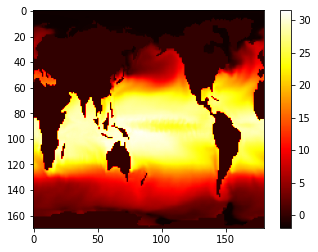

In [19]:
rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = [6, 4]
plt.figure()
plt.imshow(np.flipud(tos1),cmap='hot')
plt.colorbar()
plt.show()

In [20]:
U,S,VT = np.linalg.svd(tos1,full_matrices=0)
S = np.diag(S)

#u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)

In [21]:
U.shape

(170, 170)

The reconstruction of this image needs quite some components, because of the sharp edges of the continents. However, this example is only for demonstration.

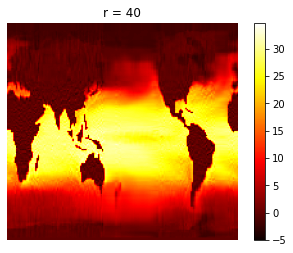

In [22]:
r = 40  # change to 1 to see first mode
Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
plt.figure()
img = plt.imshow(np.flipud(Xapprox))
img.set_cmap('hot')
plt.axis('off')
plt.title('r = ' + str(r))
plt.colorbar()
plt.show()

## SVD/PCA: TOS Dataset (Example 5)

Now we want to use SVD/PCA for a more realistic decomposition of the spatio-temporal TOS dataset, hence, we want to include all 24 maps measured over 2 years and analyze dominant spatial and temporal patterns in the data. For that we have to reshape our `tos` 3D-array into a `X` 2D-array that contains each map reshaped into a vector on one dimension, and time on the other dimension.

In [23]:
X = tos.reshape((24,lenLon*lenLat))
X = np.transpose(X)
X.shape


(30600, 24)

We can test if our reshaping works as planned, by retrieving the first row and reshaping it back into a global map and plotting it.

In [24]:
tos1 = X[:,0].reshape((lenLat,lenLon))
tos1.shape

(170, 180)

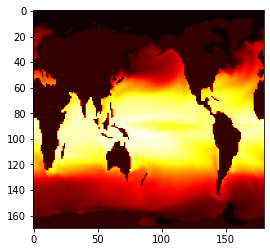

In [25]:
img = plt.imshow(np.flipud(tos1),cmap = 'hot')

The fact, that we see the continents (our no-data pixel), means our reshaping works as planned.

In the next step we want to perform a SVD/PCA with the reshaped matrix `X`, in a way to extract spatial patterns in the data.

In [26]:
u,s,vT = np.linalg.svd(X,full_matrices=0)

In [27]:
u.shape

(30600, 24)

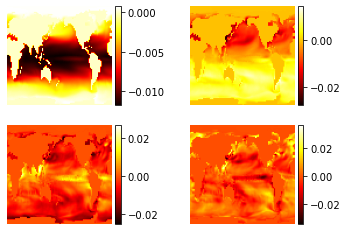

In [28]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)  # reshapes 2d axes array into a 1d array (for easier indexing)
for j in range(4):
    U = np.flipud(np.reshape(u[:,j],(lenLat,lenLon)))
    U2 = U[::2,::2]  # get only every second pixel, for smaller image size
    im = axs[j].imshow(U2,cmap='hot')
    axs[j].axis('off')
    # following lines add colorbar to each subplot
    divider = make_axes_locatable(axs[j])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical');


In [29]:
vT.shape

(24, 24)

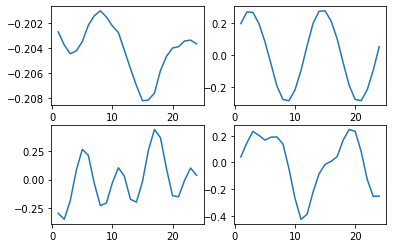

In [30]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    V = vT[j,:]
    im = axs[j].plot(range(1,len(V)+1),V)


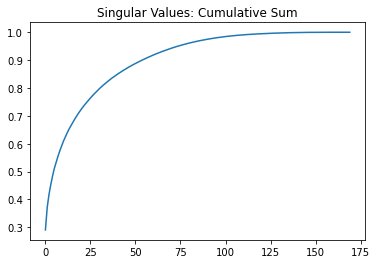

In [31]:
plt.figure()
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

Note: If we perform an SVD with a transposed `X` matrix, temporal and spatial patterns are the same, but switched between right and left singular vectors. Below we plot the temporal components, which are stored in u (instead of vT), if we perform the SVD on a transposed X matrix.

In [32]:
u,s,vT = np.linalg.svd(np.transpose(X),full_matrices=0)

In [33]:
u.shape


(24, 24)

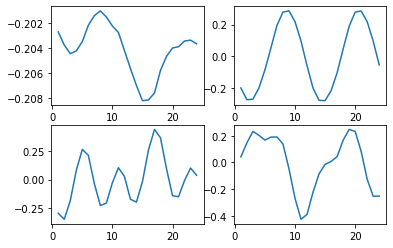

In [34]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    U = u[:,j]
    im = axs[j].plot(range(1,len(U)+1),U)


For comparison, the time series of the global mean tos looks like this:

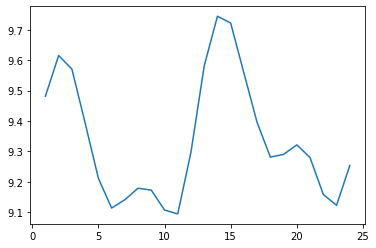

In [35]:
fig = plt.subplots(1)
im = plt.plot(range(1,25),np.mean(X,0))

Note: this is the most basic way of performing SVD / PCA. Other python packages also ahve svd and pca routines, for example scikit-learn.

The singular values contain energy of the signal components. From the following plot, we can see that the first 5 components explain almost 95% of the `tos` signal.

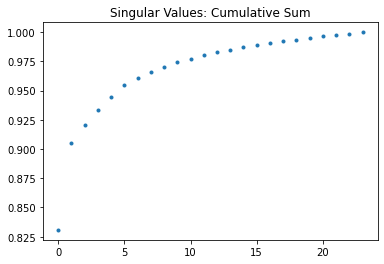

In [36]:
plt.figure()
plt.plot(np.cumsum(s)/np.sum(s),'.')
plt.title('Singular Values: Cumulative Sum')
plt.show()

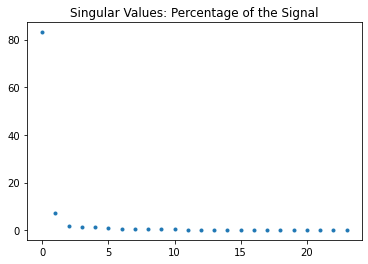

In [37]:
plt.figure()
plt.plot(s/np.sum(s)*100,'.')
plt.title('Singular Values: Percentage of the Signal')
plt.show()

Note: the land areas would normally be excluded for such an analysis. Here, we have included them for better transparency for the matrix sizes. However, land pixels could easily be excluded in X before the decomposition. Also we can limit the analysis for certain regions and other or longer temporal periods, that we might be interested in. 

The main components of the `tos` signal, might be interesting for feeding them into a predictive machine learning model. We have seen above, that the first 2 modes already explain a large part of the signal and they might be sufficient for certain prediction purposes. For example, for a prediction model that uses `tos` to derive other geophysical variables or future forecasting. 

The originally 24x170x180 parameter reduce to 170x180x2 in space and to 24x2 in time, if we consider only the first two principal signal components. 

---

# Supplement: Reconstruct time series for major component

In [41]:
u,s,vT = np.linalg.svd(X,full_matrices=0)

In [57]:
nMC = 2  # major components that will be reconstructed
recon = u[:,nMC-1:nMC] @ np.diag(s[nMC-1:nMC])@vT[nMC-1:nMC,:]  # reconstruct time series X_r = U_r*sigma_r*V_r
recon.shape

(30600, 24)

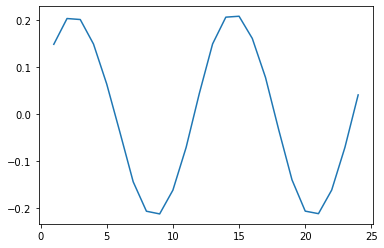

In [58]:
# Plotting the global mean of the major component (land areas removed)
fig = plt.subplots(1)
im = plt.plot(range(1,25),np.mean(recon[~mask_flat,:],0))

In [52]:
recon.shape

(30600, 24)

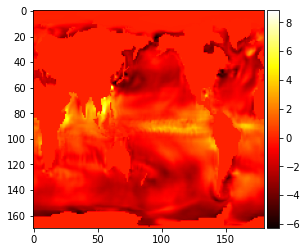

In [59]:
#  reconstructed certain feature with units: T = U*Sigma
nMC = 3
T = u[:,nMC-1:nMC] @ np.diag(s[nMC-1:nMC])
Tplot = np.flipud(np.reshape(T[:,0],(lenLat,lenLon)))

fig,axs = plt.subplots(1,1)
im = plt.imshow(Tplot,cmap='hot')
fig.colorbar(im, cax=cax, orientation='vertical');
# following lines add colorbar to each subplot
divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical');

---

# Homework

Perform a singular value decomposition (SVD/PCA) and extract the major temporal and spatial components for the `tos` data, after excluding the land areas. Comment your results and submit everything in a notebook of the name `Exercise07b.ipynb`.